In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,135","10,721,403"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","5,051,275"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,079,546","14,231,175"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,413,071","6,190,757"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.12


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.49     36.62      0.00
           survey      2.86     19.09      0.00
HOV2       model      10.01     22.05      2.03
           survey      6.74     16.93      0.00
HOV3+      model      10.27     22.22      2.05
           survey     10.32     20.86      0.00
SOV        model      10.23     22.75      2.06
           survey      8.50     19.57      0.01
School Bus model       5.74     14.64      1.15
TNC        model       2.60     10.77      0.52
           survey      3.70     13.25      0.00
Transit    model      10.73     43.53      1.50
           survey      7.35     32.49      3.08
Walk       model       0.69     13.71      0.00
           survey      0.80     17.50      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.87     19.12      0.00
           survey      2.04     12.26      0.00
HOV2       model       3.31     10.54      0.66
           survey      3.62     11.40      0.00
HOV3+      model       3.42     10.73      0.68
           survey      4.09     11.97      0.00
SOV        model       7.33     18.05      1.47
           survey      7.44     18.16      0.01
School Bus model       3.13     10.24      0.63
           survey      3.28     10.42      0.00
TNC        model       2.48      9.41      0.50
           survey      2.25     14.41      0.00
Transit    model       6.71     38.63      0.42
           survey      7.96     24.59      2.97
Walk       model       1.37     27.36      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,588,374","7,496,238"
1,"767,761","3,225,165"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,063",NaN
Full-Time Worker,"523,478","752,878"
High School Student Age 16+,"101,463",NaN
Non-Working Adult Age 65+,245,"454,587"
Non-Working Adult Age <65,"17,073","412,837"
Part-Time Worker,"41,780","1,553,064"
University Student,"81,659","51,799"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"108,033","579,783"
1.0,"515,926","1,841,168"
2.0,"657,990","1,725,429"
3+,"454,180","904,269"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k     >$75k
hhvehs source                                             
-1.0   model        0        0        0        0         0
       survey       0        0        0        0       626
0.0    model   46,382   20,561   12,391    4,238    24,425
       survey 241,446  129,906   37,383        0   171,047
1.0    model   91,984   85,282   80,961   36,152   221,446
       survey 429,115  371,718  347,661        0   692,674
2.0    model   24,542   41,559   61,848   36,388   493,588
       survey 228,397  143,841  214,538        0 1,138,653
3.0    model    6,069   10,551   21,589   14,006   256,610
       survey  67,714   12,401   57,899        0   494,384
4+     model    2,398    3,934    7,763    4,778   126,360
       survey  51,842    8,019    9,604        0   202,407

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

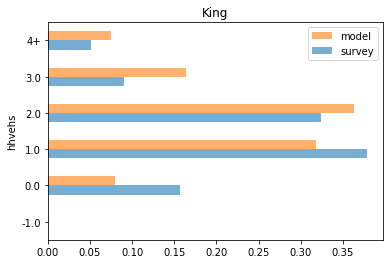

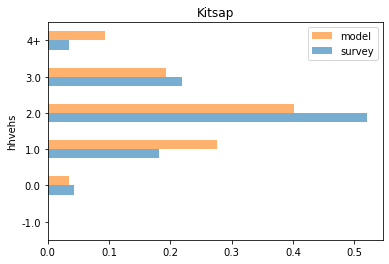

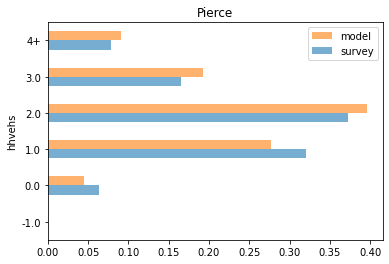

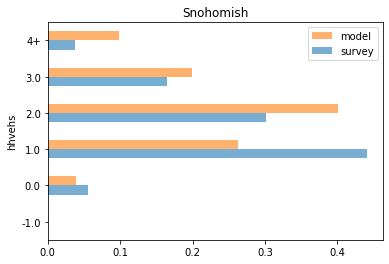

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                          
Work County      King  Kitsap  Pierce Snohomish
Home County                                    
King        1,141,094   3,627  43,558    39,687
Kitsap         12,973 104,345   4,500       191
Pierce        104,025  10,378 288,085       589
Snohomish     150,143   1,088     836   264,232